In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
import numpy as np
np.random.seed(44)



In [3]:
# see https://towardsdatascience.com/customize-your-jupyter-notebook-theme-in-2-lines-of-code-fc726cea1513
# for info on jt
!jt -t grade3 -T -N 


#font size for code
!jt -fs 14

#font size for notebook
!jt -nfs 14

zsh:1: command not found: jt
zsh:1: command not found: jt
zsh:1: command not found: jt


In [4]:
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams.update({
    "figure.figsize": [12.0, 5.0],
    'figure.facecolor': '#fffff8',
    'axes.facecolor': '#fffff8',
    'figure.constrained_layout.use': True,
    'font.size': 14.0,
    'hist.bins': 'auto',
    'lines.linewidth': 3.0,
    'lines.markeredgewidth': 2.0,
    'lines.markerfacecolor': 'none',
    'lines.markersize': 8.0, 
})

* presentare confronto medie
* poi posteiriop di Cohen
* togliere superiority


# Comparing groups


Giorgio Corani <br/>
*Bayesian Data Analysis and Probabilistic Programming*
<br/>
<br/>
``giorgio.corani@supsi.ch``





# Comparing groups

* A common task when analyzing data is to compare groups.

* Example:  *control* group and  *drug* group in a clinical trial.

*  Typically  the difference between the mean of each group is analyzed by hypothesis testing (as in *Probability and Statistics*).

* We will instead compute the *posterior* distribution of the difference between means and other indicators.

# Cohen's d

It is a  measure of the *effect size*:

$$
\displaystyle
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_2^2 + \sigma_1^2}{2}}}
$$

> * $\mu_1$, $\mu_2$: actual *unknown* means  of population one and two. 
> * $\sigma_1^2$,  $\sigma_2^2$: actual  *unknown* variances  of population one and two. 

* The denominator is the combined standard deviation of both groups.

# Cohen's d

$$
\displaystyle
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_2^2 + \sigma_1^2}{2}}}
$$

* The effect size is the difference between the two  means with respect to their combined standard deviation. 

> Cohen's d measures the effect size.  The difference in means is standardized by considering the standard deviations of both groups.

# Cohen's d

$$
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_2^2 + \sigma_1^2}{2}}}
$$


* A difference ($\mu_2 - \mu_1$)=1 when the standard deviation is 0.1 is very large compared to the same difference when the standard deviation is 10. 

* Also, a change of 1 units from one group to the other could be explained by each point _moving_ exactly 1 unit or half of the points unchanged while the other half changes 2 units, and so on with other combinations. 

* Therefore, including the intrinsic variations of the groups is a way of putting the differences in context. 

* Rescaling (standardizing) the differences helps us make sense of the difference between groups and makes it easier to assess whether the change is important, even when we are not very familiar with the scale used for the measurements.

* A Cohen's d can be interpreted as a Z-score. A Z-score is the number of standard deviations that a value differs from the mean value of what is being observed or measured, it can be positive or negative depending on whether the difference is due to excess or deficiency. Therefore, a Cohen's d of -1.2 indicates that the mean of one group is 1.2 standard deviation below the mean of the other group.

# Interpretation of Cohen's d values

$$
\displaystyle
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_2^2 + \sigma_1^2}{2}}}
$$

A common interpretation of  is:
* small  effect ($d$ = 0.2)
* medium effect  ($d$ = 0.5)
* large  effect ($d$ = 0.8)



# Interpretation of Cohen's d values

* The previous values should not be  interpreted too rigidly. 

* The best way to interpret Cohen's d is to relate it to other effects in the literature.

* A very good website for exploring what Cohen's different values look like is http://rpsychologist.com/d3/cohend.



# Point estimate of Cohen's d

\begin{align}
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_2^2 + \sigma_1^2}{2}}} \approx
\frac{\bar{x}_2 - \bar{x}_1}{\sqrt{\frac{(n_1 -1) s_2^2 + (n_2 -1) s_2^2}{n_1+n_2-2}}}
\end{align}

* We can  compute an estimate based on the empirical means ($\bar{x}_1$, $\bar{x}_2$) and variances ($\sigma^2_1$, $\sigma^2_2$) measured on the samples. 
* When calculating a pooled standard deviation, the sample size of each group is taken into account explicitly.
* We will instead take these values from the posterior samples, which already contain the uncertainty about the standard deviations.
* Anyway, the uncertainty of the  above estimate is not quantified.




# Inference about Cohen's d

$$
\displaystyle
\frac{\mu_2 - \mu_1}{\sqrt{\frac{\sigma_2^2 + \sigma_1^2}{2}}}
$$



* We will instead compute the posterior distribution of means and standard deviations, from which we will calculate the posterior  distribution of Cohen's d. 

* Of course, if we only need or want a point estimate, we could calculate the posterior mean, but this overlooks the estimation uncertainty. 

In general, when calculating a pooled standard deviation, the sample size of each group is taken into account explicitly, but Cohen's _d_ equation omits the sample size, the reason being that we take these values ​​from the _later_ (so that we are already considering the uncertainty of the standard deviations).




# Probability of superiority


This is another way of reporting the effect size and it is defined as the probability that a data point taken at random from one group has a value greater than a point taken at random from the other group. If we assume that the data we are using is Gaussian distributed, we can calculate the probability of superiority from Cohen's d using the expression:

\begin{equation} \label{eq_ps}
ps = \Phi \left ( \frac{\delta}{\sqrt{2}} \right)
\end{equation}


Where $\Phi$ is the cumulative normal distribution and $\delta$ is Cohen's d. We can calculate a point estimate of the probability of superiority (what is generally reported) or we can calculate the _posteriori_ distribution. If we do not agree with the assumption of normality, we can drop this formula and calculate it directly from the _posterior_ without the need to assume any distribution. This is one of the advantages of using sampling methods to estimate the _a posteriori_, once the samples are obtained, what we can do with them is very flexible.

# The _tips_ data set


* We will use the tips data set.  These data were first reported by Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in Business Statistics_.

* We want to study the effect of the day of the week on the amount of tips in a restaurant. 

* Thus the different groups are the days. 

In [5]:
tips = pd.read_csv('data/tips.csv')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


* We are only going to use the `day` and `tip` columns.
* ArviZ's `plot_forest` function creates a density plot for each group.
* Even though ArviZ is intended for Bayesian model analysis some of its functions can be useful for data analysis.

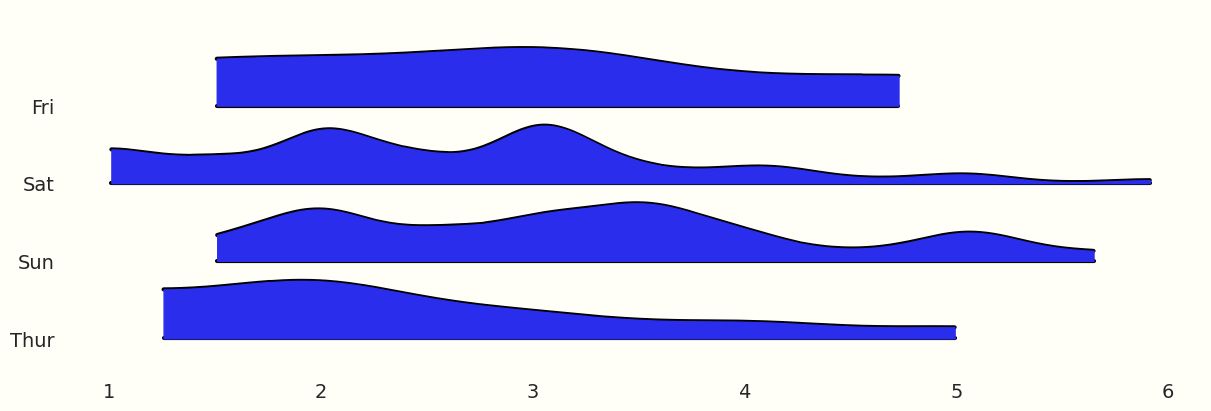

In [6]:
az.plot_forest(tips.pivot(columns='day', values='tip').to_dict('list'),
               kind='ridgeplot',
               figsize=(12, 4));

In order to simplify the analysis we will create 3 variables:
* The variable `tip` representing tips (in dollars).
* The `idx` variable that encodes the days of the week [Thursday, Friday, Saturday, Sunday] as [0, 1, 2, 3].
* The variable `groups` representing the number of groups.

In [11]:
#we consider four categories, correponding to four days of the week
categories=['Thur', 'Fri', 'Sat', 'Sun']

tip = tips['tip'].values
idx = pd.Categorical(tips['day'], categories=categories).codes
groups = len(np.unique(idx))

# Modelling
* We will use a  Gaussian model, as in the speed of light example.

* Crucially, $\mu$ and $\sigma$ will  be *vectors* instead of scalars.

* However, there is no relation between  the $i$-th and the $j$-th mean. 

* The PyMC3 syntax is very friendly:
> * we specify the `shape` argument for the priors on $\mu$ and $\sigma$ 
> * for the likelihood we use the `idx` variable to index $\mu$ and $\sigma$ to ensure that we use the correct parameters for each group. 

In [22]:
(5 / np.sqrt((trace_cg['σ'][:,i]**2 + trace_cg['σ'][:,j]**2) / 2))

KeyError: 'σ'

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


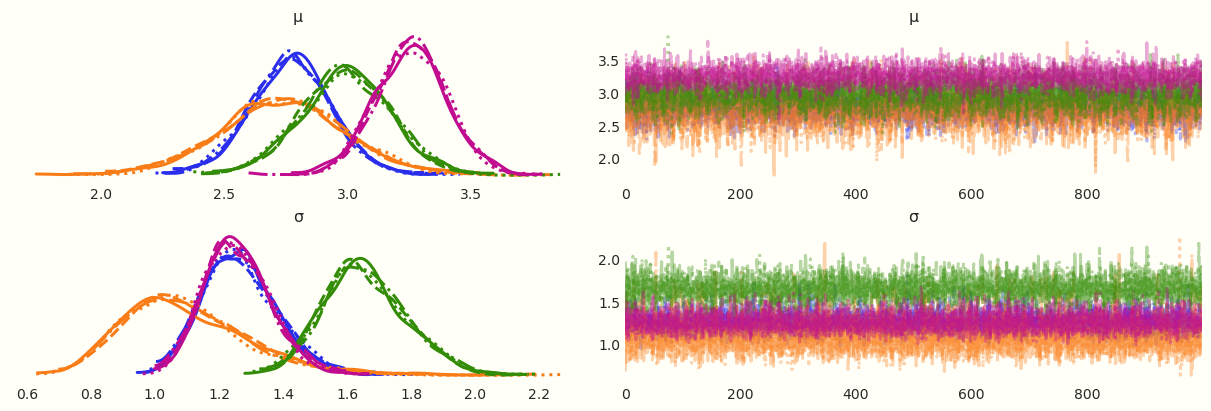

In [12]:
with pm.Model() as comparing_groups:
    
    #vector of means; as many means as the number of groups
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups)
    
    #vector of standard deviations
    σ = pm.HalfNormal('σ', sd=10, shape=groups)
    
    #likelihood, which refers to mean and std dev of the appropriate group
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=tip)
    trace_cg = pm.sample(return_inferencedata=True)
az.plot_trace(trace_cg);

# Analyzing the posterior

* The chains of each parameter mix well and each parameter has a smooth density plot.
* The density plot of different chains referring to the same parameter are very similar.
* We can thus analyze the results.

* calculate all the differences in means _a posteriori_ between them, together with the corresponding values of the _probability of superiority_ and _Cohen's d_.

*  With the following code we use `posterior_plot` to plot the differences, instead of plotting all against all (which would be redundant), we only plot the top triangular portion of the matrix.

KeyError: 'μ'

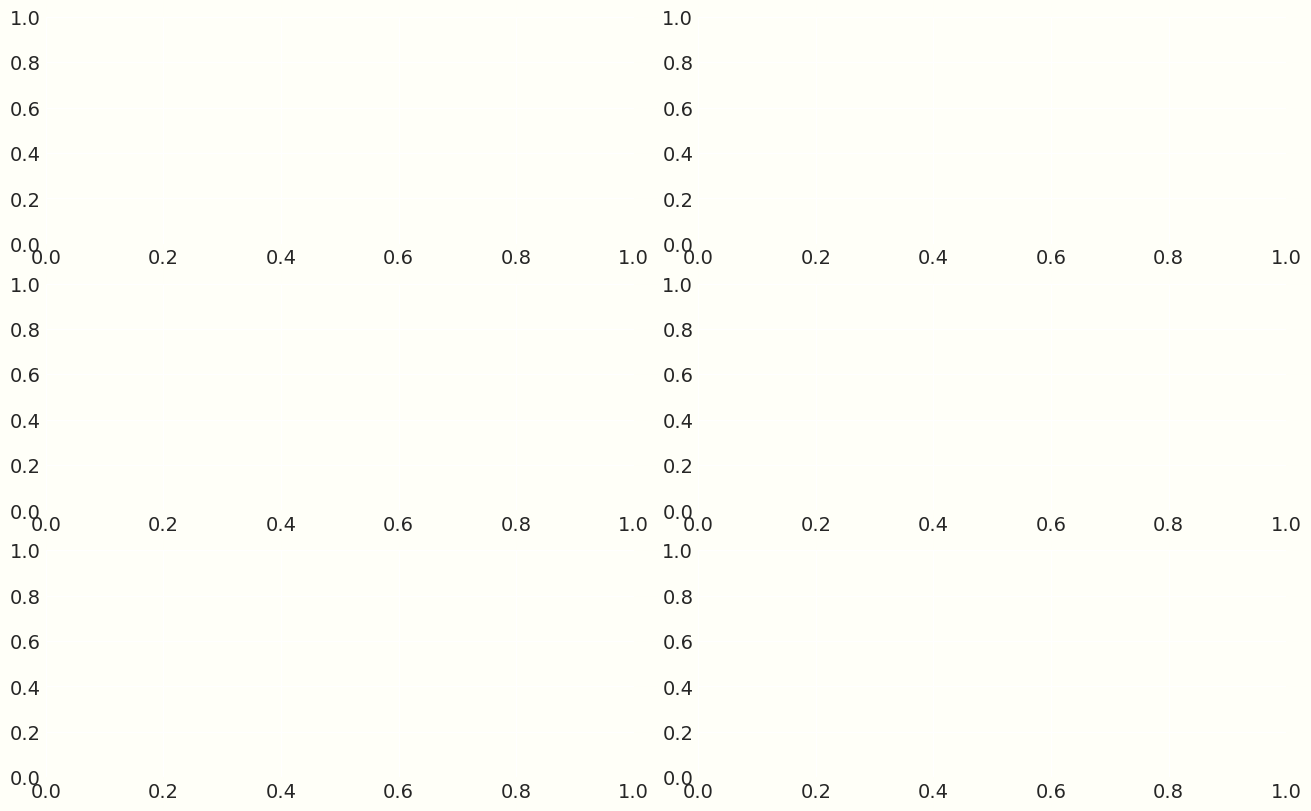

In [21]:
dist = stats.norm()

_, ax = plt.subplots(3, 2, figsize=(13, 8))

comparisons = [(i,j) for i in range(4) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]

for (i, j), (k,l) in zip(comparisons, pos):
    means_diff = trace_cg['μ'][:,i] - trace_cg['μ'][:,j]
    d_cohen = (means_diff / np.sqrt((trace_cg['σ'][:,i]**2 + trace_cg['σ'][:,j]**2) / 2)).mean()
    ps = dist.cdf(d_cohen/(2**0.5))
    az.plot_posterior(means_diff, ref_val=0, ax=ax[k, l])
    ax[k, l].set_title("%s/%s" % (categories[i], categories[j]))
    ax[k, l].plot(0, label="Cohen's d = {:.2f}\nProb sup = {:.2f}".format(d_cohen, ps), alpha=0)
    ax[k,l ].legend(fontsize=14)
plt.tight_layout()

One way to interpret these results is by comparing the reference value to the HPD range. According to the figure above, we have only one case where the 94% HPD excludes the reference value of zero, the difference in tips between Thursday and Sunday. For all other examples, we cannot rule out a difference of zero (according to HPD's benchmark overlap criteria). But even for that case, is an average difference of ≈0.5 dollars big enough? Is that difference enough to agree to work on Sunday and miss out on spending time with family or friends? Is that difference enough to justify averaging tips over the four days and giving each waiter the same amount of tip money? Those kinds of questions cannot be answered by statistics, they can only be informed by statistics.

## Hierarchical Models

The following example is taken from chapter 9 of the book "Doing Bayesian Data Analysis" by John K. Kruschke. Let's suppose that instead of 1 coin we have 3, let's further suppose that we know that the three coins were made with the same matrix (in the same factory). To estimate the value of $\theta$ we have two options:

1) estimate a value of $\theta$ for each currency separately.

2) join the three currencies in the same data set and calculate a single value of $\theta$

The advantage of option 1 is that the currencies could differ from each other so calculating 3 values ​​of $\theta$ could be very informative. The disadvantage of this model is that it ignores the information indicating that the 3 currencies have a common origin, so it is likely that they share characteristics.

The advantage of option 2 is that the amount of data per parameter has increased, which reduces uncertainty. The problem is that we go on to assume that the 3 coins are actually one, which would not be a problem if the three coins were very similar to each other, but this might not be a good approximation.

A third option is to do something halfway between 1 and 2. This is achieved by building a hierarchical or multilevel model. This type of model will allow us to estimate a value of $\theta$ for each currency in such a way that the estimate of each value of $\theta$ influences the rest.

In Bayesian statistics, building hierarchical models is easy. Next we will see that a hierarchical model for the 3 currencies is very similar to the one used for the case of 1 single currency, only now we place an _a priori_ on top of the _a priori_!

Recall, the model from the previous chapter was:

\begin{align}
\theta &\sim \operatorname{Beta}(\alpha, \beta) \\
and &\sim \operatorname{Bin}(n=1, p=\theta)
\end{align}

In a hierarchical model the arguments of the Beta distribution ($\alpha$ and $\beta$) are not constants but are values ​​that come from some other distribution. In our model we will have:

\begin{align}
\mu &\sim \operatorname{Beta}(\alpha, \beta) \\
\kappa &\sim \operatorname{Gamma}(s, r) \\
\theta &\sim \operatorname{Beta}(\alpha=\mu \kappa, \beta=(1 - \mu) \kappa) \\
and &\sim \operatorname{Bin}(n=1, p=\theta)
\end{align}

In hierarchical models, the parameters $\mu$ and $\kappa$ are called _hyper a prioris_ or _hyperparameters_ since they are the ones that determine the value of the _a priori_. The difference between the model of the previous chapter and the one of the present one is that now the values ​​that $\theta$ can take depend not on a fixed distribution ($\alpha=1$ and $\beta=1$) but on a distribution that depends on the values ​​of $\mu$ and $\kappa$, and that we will estimate from the data. In other words, it is possible to estimate the _a priori_ from the data, but only because we have introduced _hyper a priori_.

You will recall that the Beta distribution could be parameterized in terms of $\alpha$ and $\beta$, but also $\mu$ and $\kappa$, where $\mu$ is the mean and $\kappa$ is the concentration. (the inverse of dispersion). We then have that $\mu$ will reflect the average value of 3 values ​​of $\theta$ and that if the proportion of heads in the three coins is similar to each other, $\kappa$ will take a higher value; while if the currencies are different from each other $\kappa$ will take a lower value.

### Why the choice of hyper *a prioris*?

Well since $\mu$ is the mean of the vector $\theta$ (and $\theta$ can only take values between 0 and 1), $\mu$ is restricted to values between 0 and 1 (just like a beta distribution), following the same reasoning $\kappa$ goes between $[0, \infty]$ just like the gamma distribution. Other equally reasonable distributions could have been:

* $ \mu \sim U(0, 1)$
* $ \kappa \sim \mathcal{HN}(\sigma=100)$


First of all let's generate some synthetic data and put it in a way that is easier to pass to the model, this will be a bit clearer when specifying the model.

Let's suppose that with each of the 3 coins we did 10 Bernoulli experiments (we threw them in the air) and obtained 5 heads for each case.

In [ ]:
N =  [10, 10, 10]  # Número de experimentos por moneda
z =  [5, 5, 5]  # [1, 5, 9]  # Número de caras en los Ni experimentos.

# vector conteniendo los índices para cada moneda (desde 0 al número de monedas)
monedas = np.repeat(np.arange(len(N)), N)
# lista con 1 para caras y 0 para cecas
datos = []  
for i, experimentos in enumerate(N):
    datos.extend(np.repeat([1, 0], [z[i], N[i]-z[i]]))

Since we don't know much about $\mu$ and $\kappa$, we are going to choose $ \mu \sim \operatorname{Beta}(\alpha=2, \beta=2)$, which is equivalent to a distribution centered at 0.5 , but which almost assigns the same probability to all values between 0 and 1. And $ \kappa = \operatorname{Gamma}(s=1, r=0.1)$, which is equivalent to a curve with mean and standard deviation 10 .

The model specification is the same as what we have been doing, the only difference is that in line 8 we can see that there is an argument calling _shape_. This allows us to specify the dimensions of (in this case) _$\theta$_. PyMC3 allows us to write _vectorized_ models saving us from having to write _for loops_. That's why in the top cell we create a vector _coins_ that we use in line 10 (of the model specification) to index _theta_.

In [ ]:
with pm.Model() as modelo_j:
    # definimos los hiperparámetros
    μ = pm.Beta('μ', alpha=2, beta=2)
    κ = pm.Gamma('κ', alpha=1, beta=0.1)
    #κ = pm.Gamma('κ', mu=10, sd=10)
    
    # definimos el a priori
    θ = pm.Beta('θ', μ * κ, (1 - μ) * κ, shape=len(N))
    # definimos el likelihood
    y = pm.Bernoulli('y', p=θ[monedas], observed=datos)

    # muestreamos
    trace_j = pm.sample(2000)

In [ ]:
az.plot_trace(trace_j);

In [ ]:
# az.plot_autocorr(trace_j);

In [ ]:
az.summary(trace_j)

We can observe that the value of $\kappa$ of the _a posteriori_ is greater than that of the _a priori_. This is reasonable since the experiments with all 3 coins have been identical, indicating that the matrix has a significant effect on the result of $\theta$ for each coin.

What distribution would we have obtained for $\kappa$ if the coins had shown different results?
Let's test what would have happened if:

```python
z = [1, 5, 9]
```

### Looking at the _after the fact_ from various sides

The _a posteriori_ contains all the information that results from a Bayesian analysis. So it can be very informative to analyze it from various sides. In addition to the graphs provided by PyMC3, we can analyze the _a posteriori_ using our own graphs, for example we may be interested in observing how different parameters correlate.

In [ ]:
# Creamos arreglos tomando muestras del posterior
theta1_pos = trace_j['θ'][:,0]
theta2_pos = trace_j['θ'][:,1]
theta3_pos = trace_j['θ'][:,2]
mu_pos = trace_j['μ']
kappa_pos = trace_j['κ']

_, ax = plt.subplots(4, 3, figsize=(12, 12), constrained_layout=True)

# Gráficos de dispersión de los hiper-parámetros
ax[0, 0].scatter(mu_pos, kappa_pos, marker='o', alpha=0.01)
ax[0, 0].set_xlim(0,1)
ax[0, 0].set_xlabel(r'$\mu$')
ax[0, 0].set_ylabel(r'$\kappa$')

az.plot_posterior(mu_pos, ax=ax[0, 1], round_to=1)
ax[0, 1].set_xlabel(r'$\mu$')
ax[0, 1].set_xlim(0,1)

az.plot_posterior(kappa_pos, ax=ax[0, 2], round_to=1)
ax[0, 2].set_xlabel(r'$\kappa$')
count = 1
for i, j in (theta1_pos, 'theta1'), (theta2_pos, 'theta2'), (theta3_pos, 'theta3'):
    az.plot_posterior(i, ax=ax[count, 0], round_to=1)
    ax[count, 0].set_xlabel('$\{}$'.format(j))
    ax[count, 0].set_xlim(0,1)
    countb = 1
    for k, l in (mu_pos, 'mu'), (kappa_pos, 'kappa'):
        ax[count, countb].scatter(k, i, marker='o', alpha=0.1)
        ax[count, countb].set_xlabel('$\{}$'.format(l))
        ax[count, countb].set_ylabel('$\{}$'.format(j), rotation=0)
        ax[count, countb].set_xlim(0)
        ax[count, countb].set_ylim(0,1)
        countb += 1
    count += 1

### Contraction (*shrinking*)

Now let's try other examples (it may be convenient to save the figures obtained with different names).

* z = [1,1,1]
* z = [9,9,9]
* z = [9,1,9]

What are the values ​​of $\theta$ obtained in each case? Is the estimated value of $\theta$ for a coin when it lands 1 out of 10 heads (and the other two also) the same as when one coin lands 1 out of 10 heads and the other two lands 9 out of 10 heads?

As you can see if you do the exercise, the estimated value $\theta$ is not the same! Why does this happen?

Because the model specifies that the currencies are NOT independent. The model assumes that the 3 currencies come from the same matrix, therefore the estimation of $\theta$ for one currency is affected by the others and at the same time affects the others. This phenomenon is called shrinkage, the reason for the name is that the individual estimates tend to shrink around the average value of the 3 estimates (in our model $\mu$) this becomes more evident for the _outlier_ values. If all the coins except one indicate a value of $\theta$ more or less similar, the one with the different value will have a $\theta$ much closer to the value of the others than if we had estimated it individually.

This may seem problematic to you, but it is just a reflection of what we assumed when creating the model. The matrix with which the coins were cast influences the bias of the coins. Thus, the estimate of each element of the vector $\theta$ must influence and be influenced by the estimates of the other elements of $\theta$. This is a form of regularization that frequentist methods must introduce _ad-hoc_, but which is nevertheless already included in a Bayesian analysis.

So the hierarchical Bayesian model we've built tells us, not just the values ​​of $\theta$, but the values ​​of $\mu$ (the average bias) introduced by the matrix and the values ​​of $\kappa$ (how strong it is). the effect of the matrix on the individual biases of $\theta$).

### Let's look at another example


[Proteins](https://www.youtube.com/watch?v=wvTv8TqWC48) are molecules made up of 20 bonds, called amino acids, each amino acid can appear in a protein 0 or more times. Just as a melody is defined by a succession of musical notes, a protein is defined by a succession of amino acids. Some variations of notes can result in small variations on the same melody, other variations can result in completely different melodies, something similar happens with proteins. One way to study proteins is using nuclear magnetic resonance (the same technique used for medical imaging). This technique allows us to measure various _observables_, one of them is called _chemical shift_ and to simplify we will say that we can measure as many chemical shifts as there are amino acids in a protein. Amino acids are a family of chemical compounds so it would make sense to treat them all the same, but at the same time they have different chemical properties, which are in fact relevant to understanding how proteins work! So it also makes sense to treat them separately. As we have already seen, an alternative is to build a hierarchical model and do something halfway.

The following data set contains chemical shift values ​​for a set of proteins. If you inspect the DataFrame `cs_data` you will see that it has 4 columns:

* The first is a code that identifies the protein (you can get a lot of information about that protein by entering that code at https://www.rcsb.org/.).
* The second column has the name of the amino acid (you can check that there are only 20 unique names).
* The third contains theoretical values ​​of chemical shifts (calculated using quantum methods).
* The fourth has experimental values.

The motivation of this example is to compare the differences between theoretical and experimental values, among other reasons to evaluate the ability of quantum methods to reproduce experimental values.

In [ ]:
cs_data = pd.read_csv('datos/chemical_shifts_theo_exp.csv')
diff = cs_data.theo - cs_data.exp
idx = pd.Categorical(cs_data['aa']).codes
groups = len(np.unique(idx))

cs_data.tail()

To highlight the difference between a hierarchical and a non-hierarchical model we are going to build both. First the non-hierarchical.

In [ ]:
with pm.Model() as cs_nh:         
    μ = pm.Normal('μ', mu=0, sd=10, shape=groups) 
    σ = pm.HalfNormal('σ', sd=10, shape=groups) 
 
    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=diff) 
     
    trace_cs_nh = pm.sample(1000)

And now the hierarchy.

This model has a hyper-prior for the mean of $\mu$ and another for the standard deviation of $\mu$. For $\sigma$ we do not use a hyper-prior, ie we assume independent values. This is a decision I made to simplify the model, in principle there would be no problem with using a hyper-prior also for $\sigma$ or even estimating a single, shared value of $\sigma$.

In [ ]:
with pm.Model() as cs_h:
    # hyper_priors
    μ_mu = pm.Normal('μ_mu', mu=0, sd=10)
    μ_sd = pm.HalfNormal('μ_sd', 10)

    # priors
    μ = pm.Normal('μ', mu=μ_mu, sd=μ_sd, shape=groups) 
    σ = pm.HalfNormal('σ', sd=10, shape=groups) 

    y = pm.Normal('y', mu=μ[idx], sd=σ[idx], observed=diff) 

    trace_cs_h = pm.sample(1000)

Let's compare the results using a `plot_forest`. ArviZ allows passing more than one model. This is useful when we want to compare equivalent parameter values between models as in the present example. Notice that we are passing multiple arguments to get the graph, such as `combined=True` which combines the results of all the strings. I invite you to explore the meaning of the rest of the parameters.

In [ ]:
axes = az.plot_forest([trace_cs_nh, trace_cs_h], model_names=['non_hierarchical', 'hierarchical'],
                      var_names='μ', combined=True, r_hat=False, ess=False, figsize=(10, 12),
                      colors='cycle')
y_lims = axes[0].get_ylim()
axes[0].vlines(trace_cs_h['μ_mu'].mean(), *y_lims);

Well, we have a plot for 40 estimated mean values, one per amino acid (20) and this is doubled since we have two models. We also have the 94% credibility intervals and the interquartile range (the interval containing the middle 50% of the distribution). The vertical line is the partially clustered mean, that is, the mean according to the hierarchical model. The value is close to zero, this is part of what we would expect to see if the theoretical values ​​​​are good at reproducing the experimental values.

The most relevant part of this plot is that the hierarchical model estimates are _pulled_ toward the partially pooled mean or, equivalently, _contracted_ to the unpooled estimates. This effect is more noticeable for the farthest groups from the mean (such as 13), and the uncertainty is equal to or less than that of the non-hierarchical model. We say that the estimates are partially pooled because we have one estimate for each pool, but the estimates for each pool are mutually constrained by the hyper prior. Therefore, an intermediate situation is obtained between having a single group, all the amino acids together, and having 20 separate groups, one per amino acid.

Paraphrasing the Zen of Python, we can say: _hierarchical models are one honking great idea - let's do more of those!_.

In the next chapters, we will continue building hierarchical models and learning how to use them to build better models. We will also discuss how hierarchical models relate to one of the most common problems in statistics, data science and _Machine learning_ the problem of overfitting/underfitting.

## Resume

Although Bayesian statistics is conceptually simple, probabilistic models often lead to analytically intractable expressions. For many years, this was a major barrier to the wide adoption of Bayesian methods. Fortunately, mathematics, physics, and computer science came to the rescue in the form of numerical methods capable, at least in principle, of solving any inference. The possibility of automating the inference process has led to the development of probabilistic programming languages ​​that allow a clear separation between model definition and inference.

PyMC3 is a Python library for probabilistic programming with a simple, intuitive and easy to read syntax that is also very close to the statistical syntax used to describe probabilistic models. In this chapter we introduce the PyMC3 library by revising the coin problem we saw in Chapter 1, but this time without analytically deriving the _a posteriori_ distribution. Models in PyMC3 are defined inside a `with` block; To add a probability distribution to a model, we only need to write one line of code. The distributions can be combined and can be used as priors (unobserved variables) or likelihoods (observed variables), in the PyMC3 syntax the only difference between the two is that for the latter we pass the data. PyMC3 allows us to obtain samples from the distribution _a posteriori_, if all goes well, these samples will be representative of the correct distribution and therefore will be a representation of the logical consequences of the model and the data.

ArviZ is a library that helps us explore the post generated by PyMC3. One way to use the posterior to help us make decisions is by comparing the ROPE to the HPD interval. We also briefly mention the notion of loss functions, a formal approach to quantify the costs and benefits associated with decision making. We learned that loss functions and point estimates are closely associated.

Until this moment all the examples were based on models with a single parameter. However PyMC3 allows, in principle, to use an arbitrary number of parameters, we exemplify this with a Gaussian model and then a generalization of it, the Student's t-model. The Student's t distribution is often used as an alternative to the Gaussian when we want to make robust inferences to outliers. In the next chapter we will see how this model can be used as part of linear regression models.

We also use Gaussians to model comparisons between groups, a common task in data analysis. While this is sometimes framed in the context of hypothesis testing, we take another route and work this problem as effect size inference, an approach that I find much richer. We also explore different ways of interpreting and reporting effect sizes.

We close the chapter with one of the most important concepts of this course: hierarchical models. We can build hierarchical models whenever we can identify subgroups in our data. In such cases, instead of treating the subgroups as separate entities or ignoring the subgroups and treating them as a single grand-group, we can build a model to partially-group the information between the groups. The main effect of this partial-pooling is that the estimates of each subgroup will be biased by the estimates of the rest of the subgroups. This effect is known as contraction and, in general, it is a very useful trick that helps improve inferences by making them more conservative (since each subgroup informs the others by bringing the rest of the estimates closer to it) and more informative, we obtain estimates at subgroup level and the group level.

## To continue reading

* The [PyMC3 documentation](https://pymc-devs.github.io/pymc3/.) has several examples of how to use this library and different types of models.


* [Probabilistic Programming and Bayesian Methods for Hackers](https://github.com/quantopian/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) by Cameron Davidson-Pilon and several other contributors. Originally written in PyMC2 has been ported to PyMC3


* [While My MCMC Gently Samples](http://twiecki.github.io/.). A blog from Thomas Wiecki, developer of PyMC3.


* [Statistical Rethinking by Richard McElreath](https://xcelab.net/rm/statistical-rethinking/) is probably the best introductory book on Bayesian statistics. The book uses R/Stan. But several people have contributed to [port the code to Python/PyMC3](https://github.com/pymc-devs/resources/tree/master/Rethinking)


* [Doing Bayesian Data Analysis](http://www.indiana.edu/~kruschke/DoingBayesianDataAnalysis/) by John K. Kruschke is another fairly accessible introductory book. Most of the examples from the first edition are available at [Python/PyMC3](https://github.com/aloctavodia/Doing_bayesian_data_analysis) and from the second edition [here](https://github.com/JWarmenhoven/DBDA -python).

## Exercises


6. Modify the tip model to use a Student's t-distribution, testing using a single $\nu$ for all four groups and also using a value of $\nu$ per group.


7. Calculate the probability of superiority from the posterior samples (without using the probability of superiority formula from Cohen's d). Compare the results with the values ​​obtained analytically.


8. I repeated the exercise we did with the `model_j`, but without the hierarchical structure. Compare the results with those obtained hierarchically.


9. Create a hierarchical version for the tips example by partially grouping the days of the week.


10. Apply at least one of the models seen in this chapter to data of your own or of interest to you.